In [4]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

In [5]:
#Loading Dataset
df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)
features_column  = df.iloc[: , :30]
X = features_column
y = df[30]

## Random Forest DATASET1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, np.ravel(y_train));
y_pred = rf.predict(X_test)


clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Accuracy",accuracy_score(y_test, y_pred))
clf_report

Accuracy 0.9649122807017544


,0,1,accuracy,macro avg,weighted avg
precision,0.964286,0.966102,0.964912,0.965194,0.964934
recall,0.981818,0.934426,0.964912,0.958122,0.964912
f1-score,0.972973,0.950000,0.964912,0.961486,0.964778
support,110.000000,61.000000,0.964912,171.000000,171.000000


## Hyperparameter Random Forest DATASET1

In [7]:
param_grid = {
'max_depth': [10, 20, 30, 40, 50],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}


rf = RandomForestClassifier(n_estimators = 100, random_state = 1)


scoring = ['accuracy','f1_macro','roc_auc', 'average_precision','recall' ]
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring = scoring, verbose=3, refit='accuracy', return_train_score=True)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=3, scoring = "accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Accuracy ",grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (train=1.000, test=1.000) average_precision: (train=1.000, test=1.000) f1_macro: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) roc_auc: (train=1.000, test=1.000) total time=   0.4s
[CV 6/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; accuracy: (train=1.000, test=0.925) average_precision: (train=1.000, test=0.991) f1_macro: (train=1.000, test=0.919) recall: (train=1.000, test=0.867) roc_auc: (train=1.000, test=0.995) total time=   0.7s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; accuracy: (train=1.000, test=0.950) average_precision: (train=1.000, test=0.982) f1_macro: (train=1.000, test=0.945) recall: (train=1.000, test=0.867) roc_auc: (train=1.000, test=0.987) total time=   1.1s
[C

Text(0, 0.5, 'Standard Deviation')

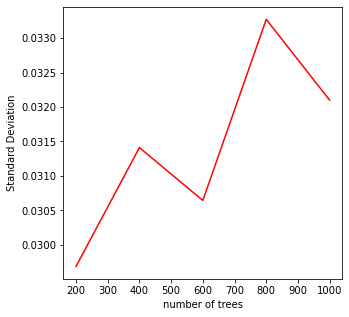

[CV 5/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800; accuracy: (train=0.942, test=0.688) average_precision: (train=0.986, test=0.717) f1_macro: (train=0.934, test=0.654) recall: (train=0.854, test=0.545) roc_auc: (train=0.991, test=0.805) total time=   2.2s
[CV 3/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; accuracy: (train=0.941, test=0.667) average_precision: (train=0.984, test=0.652) f1_macro: (train=0.933, test=0.616) recall: (train=0.843, test=0.417) roc_auc: (train=0.990, test=0.762) total time=   3.0s
[CV 1/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; accuracy: (train=0.928, test=0.697) average_precision: (train=0.971, test=0.660) f1_macro: (train=0.918, test=0.618) recall: (train=0.824, test=0.333) roc_auc: (train=0.982, test=0.758) total time=   0.5s
[CV 4/10] END max_depth=50, max_features=auto, min_samples_leaf=4

In [15]:
grid_search.cv_results_
x=pd.DataFrame(grid_search.cv_results_).groupby(['param_n_estimators']).mean().index
y=pd.DataFrame(grid_search.cv_results_).groupby(['param_n_estimators']).mean()['mean_test_accuracy']
z=pd.DataFrame(grid_search.cv_results_).groupby(['param_n_estimators']).mean()['mean_train_accuracy']
v=pd.DataFrame(grid_search.cv_results_).groupby(['param_n_estimators']).mean()['std_test_accuracy']

plt.figure(figsize=(5,5))
plt.axes().plot(x,v,color='red')
plt.xlabel("number of trees")
plt.ylabel("Standard Deviation")

## 10-Fold Cross Validation Random Forest DATASET1

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))
      

Fold:  1, Training/Test Split Distribution: [223 135], Accuracy: 0.900
Fold:  2, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  3, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  4, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  5, Training/Test Split Distribution: [222 136], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [222 136], Accuracy: 0.925
Fold:  7, Training/Test Split Distribution: [222 136], Accuracy: 0.950
Fold:  8, Training/Test Split Distribution: [222 136], Accuracy: 0.975
Fold:  9, Training/Test Split Distribution: [223 136], Accuracy: 0.974
Fold: 10, Training/Test Split Distribution: [223 136], Accuracy: 0.949


Cross-Validation accuracy: 0.955 +/- 0.027

List of possible accuracy: [0.9, 0.95, 0.975, 0.95, 1.0, 0.925, 0.95, 0.975, 0.9743589743589743, 0.9487179487179487]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 90.0 %

Overall Accuracy: (95.48076923076

## Random Forest DATASET2


In [10]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [11]:
#Loading Dataset
df = pd.read_csv("project3_dataset2.txt",sep='\t',header=None)
df[4] = df[4].map( {'Present':1 , 'Absent':0} )
features_column  = df.iloc[: , :9]
X = features_column
y = df[9]
X

,0,1,2,3,4,5,6,7,8
0,132,6.20,6.47,36.21,1,62,30.77,14.14,45
1,123,0.05,4.61,13.69,0,51,23.23,2.78,16
2,128,0.50,3.70,12.81,1,66,21.25,22.73,28
3,114,9.60,2.51,29.18,0,49,25.67,40.63,46
4,150,0.30,6.38,33.99,1,62,24.64,0.00,50
...,...,...,...,...,...,...,...,...,...
457,114,4.08,4.59,14.60,1,62,23.11,6.72,58
458,136,2.80,2.53,9.28,1,61,20.70,4.55,25
459,138,4.50,2.85,30.11,0,55,24.78,24.89,56
460,170,7.60,5.50,37.83,1,42,37.41,6.17,54


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, np.ravel(y_train));
y_pred = rf.predict(X_test)


clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print("Accuracy",accuracy_score(y_test, y_pred))
clf_report

Accuracy 0.6906474820143885


,0,1,accuracy,macro avg,weighted avg
precision,0.740385,0.542857,0.690647,0.641621,0.675016
recall,0.827957,0.413043,0.690647,0.620500,0.690647
f1-score,0.781726,0.469136,0.690647,0.625431,0.678279
support,93.000000,46.000000,0.690647,139.000000,139.000000


## Hyperparameter Random Forest DATASET2

In [13]:
param_grid = {
'max_depth': [10, 20, 30, 40, 50],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000]
}


rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

scoring = ['accuracy','f1_macro','roc_auc', 'average_precision','recall' ]
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring = scoring, verbose=3, refit='accuracy', return_train_score=True)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print(grid_search.best_estimator_)
print(grid_search.best_params_)
print("Accuracy ",grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")


Fitting 10 folds for each of 450 candidates, totalling 4500 fits
[CV 9/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600; accuracy: (train=0.983, test=0.974) average_precision: (train=0.998, test=0.991) f1_macro: (train=0.982, test=0.973) recall: (train=0.971, test=1.000) roc_auc: (train=0.999, test=0.994) total time=   1.6s
[CV 7/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; accuracy: (train=0.989, test=0.950) average_precision: (train=0.999, test=0.966) f1_macro: (train=0.988, test=0.947) recall: (train=0.978, test=0.933) roc_auc: (train=0.999, test=0.979) total time=   2.3s
[CV 5/10] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; accuracy: (train=0.983, test=1.000) average_precision: (train=0.998, test=1.000) f1_macro: (train=0.982, test=1.000) recall: (train=0.971, test=1.000) roc_auc: (train=0.999, test=1.000) total time=   3.0s
[

## 10-Fold Cross Validation Random Forest DATASET2

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nList of possible accuracy:', scores)
print('\nMaximum Accuracy That can be obtained from this model is:', max(scores)*100, '%')
print('\nMinimum Accuracy:', min(scores)*100, '%')
print('\nOverall Accuracy:', (np.mean(scores)*100, '%'))
print('\nStandard Deviation is:', np.std(scores))


Fold:  1, Training/Test Split Distribution: [188 102], Accuracy: 0.636
Fold:  2, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  3, Training/Test Split Distribution: [188 102], Accuracy: 0.667
Fold:  4, Training/Test Split Distribution: [188 103], Accuracy: 0.656
Fold:  5, Training/Test Split Distribution: [188 103], Accuracy: 0.750
Fold:  6, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold:  7, Training/Test Split Distribution: [188 103], Accuracy: 0.688
Fold:  8, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold:  9, Training/Test Split Distribution: [188 103], Accuracy: 0.719
Fold: 10, Training/Test Split Distribution: [189 102], Accuracy: 0.688


Cross-Validation accuracy: 0.691 +/- 0.033

List of possible accuracy: [0.6363636363636364, 0.6666666666666666, 0.6666666666666666, 0.65625, 0.75, 0.71875, 0.6875, 0.71875, 0.71875, 0.6875]

Maximum Accuracy That can be obtained from this model is: 75.0 %

Minimum Accuracy: 63.6363636363